In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data=pd.read_csv('time_series_ass3.unknown')

In [8]:
data.head()

,Unnamed: 0,From,To (Interval: 15M),PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3)
0,0,2023-02-01 00:00:00,2023-02-01 00:15:00,95.0,35.0,NaN
1,1,2023-02-01 00:15:00,2023-02-01 00:30:00,95.0,35.0,NaN
2,2,2023-02-01 00:30:00,2023-02-01 00:45:00,95.0,35.0,NaN
3,3,2023-02-01 00:45:00,2023-02-01 01:00:00,122.0,34.0,NaN
4,4,2023-02-01 01:00:00,2023-02-01 01:15:00,122.0,34.0,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          8640 non-null   int64  
 1   From                8640 non-null   object 
 2   To (Interval: 15M)  8640 non-null   object 
 3   PM10 (µg/m3)        6959 non-null   float64
 4   PM2.5 (µg/m3)       8414 non-null   float64
 5   NO (µg/m3)          7271 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 405.1+ KB


In [10]:
data=data.drop(columns='Unnamed: 0')

<Axes: >

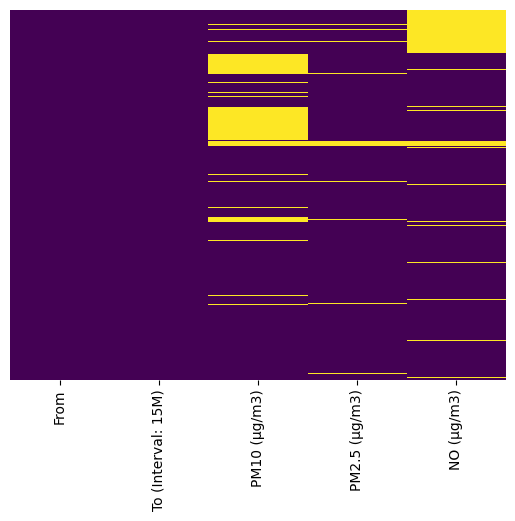

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

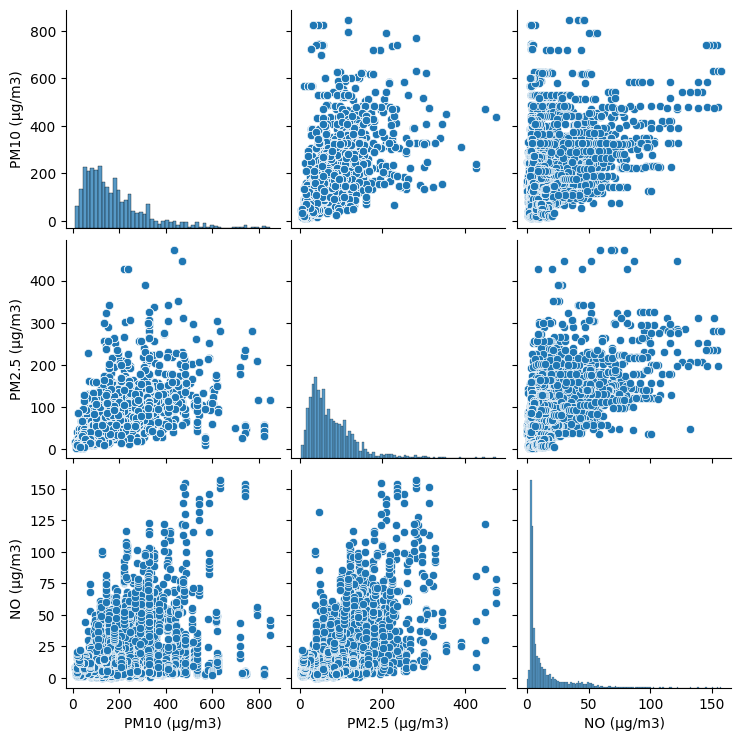

In [12]:

sns.pairplot(data=data)

In [13]:
data['To (Interval: 15M)'] = pd.to_datetime(data.pop('To (Interval: 15M)'), format='%Y.%m.%d %H:%M:%S')

In [14]:
data['From']=pd.to_datetime(data.pop('From'), format='%Y.%m.%d %H:%M:%S')

In [15]:
data.head()

,PM10 (µg/m3),PM2.5 (µg/m3),NO (µg/m3),To (Interval: 15M),From
0,95.0,35.0,NaN,2023-02-01 00:15:00,2023-02-01 00:00:00
1,95.0,35.0,NaN,2023-02-01 00:30:00,2023-02-01 00:15:00
2,95.0,35.0,NaN,2023-02-01 00:45:00,2023-02-01 00:30:00
3,122.0,34.0,NaN,2023-02-01 01:00:00,2023-02-01 00:45:00
4,122.0,34.0,NaN,2023-02-01 01:15:00,2023-02-01 01:00:00


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

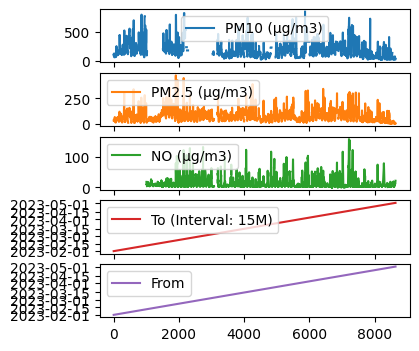

In [16]:
data.plot(subplots=True, figsize=(4, 4))

In [17]:
col=['PM10 (µg/m3)','PM2.5 (µg/m3)','NO (µg/m3)']
data[col]=data[col].interpolate(method='linear',limit_direction='both')

In [18]:
from sklearn.ensemble import IsolationForest
def remove_out(data, contamination=0.05):
  isolation_forest = IsolationForest(n_estimators=100, contamination=0.1)
  outliers= isolation_forest.fit_predict(data)
  return data[outliers != -1]


In [19]:

data[col]=remove_out(data[col])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


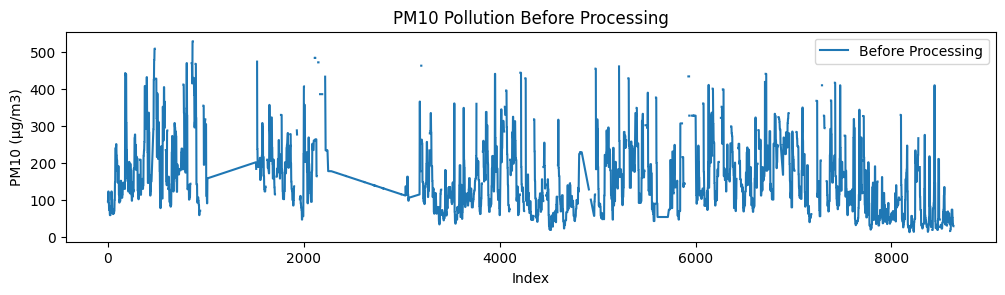

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['PM10 (µg/m3)'], label='Before Processing')
plt.xlabel('Index')
plt.ylabel('PM10 (µg/m3)')
plt.title('PM10 Pollution Before Processing')
plt.legend()

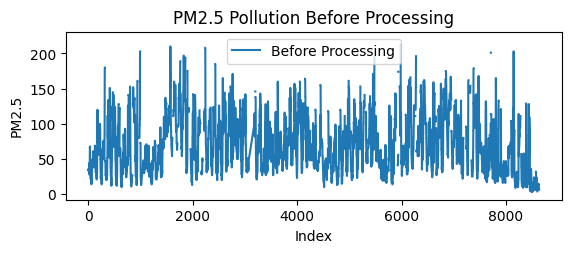

In [27]:
plt.subplot(2, 1, 2)
plt.plot(data.index, data['PM2.5 (µg/m3)'], label='Before Processing')
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.title('PM2.5 Pollution Before Processing')
plt.legend()


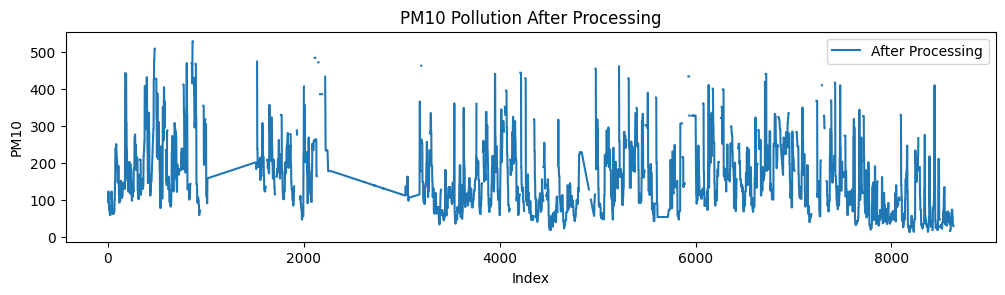

In [28]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data.index, data['PM10 (µg/m3)'], label='After Processing')
plt.xlabel('Index')
plt.ylabel('PM10')
plt.title('PM10 Pollution After Processing')
plt.legend()

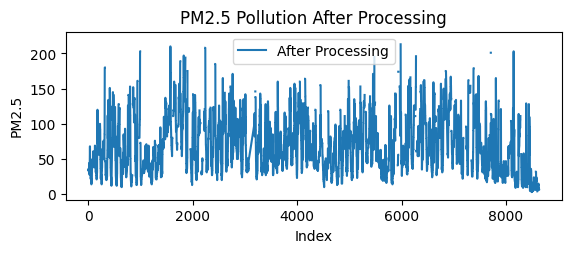

In [29]:
plt.subplot(2, 1, 2)
plt.plot(data.index, data['PM2.5 (µg/m3)'], label='After Processing')
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.title('PM2.5 Pollution After Processing')
plt.legend()

In [20]:
from statsmodels.tsa.arima.model import ARIMA
data['To (Interval: 15M)'] = data['To (Interval: 15M)'].map(pd.Timestamp.timestamp)
data['From'] = data['From'].map(pd.Timestamp.timestamp)



In [21]:
order = (2,1,1)
model = ARIMA(data['PM10 (µg/m3)'], order=order)
model_fit = model.fit()


forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)


print("Forecasted values:")
print(forecast)



Forecasted values:
8640    27.993861
8641    27.993860
8642    27.993860
8643    27.993860
8644    27.993860
8645    27.993860
8646    27.993860
8647    27.993860
8648    27.993860
8649    27.993860
Name: predicted_mean, dtype: float64


In [22]:
order = (2,1,1)
model = ARIMA(data['PM2.5 (µg/m3)'], order=order)
model_fit = model.fit()
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)


print("Forecasted values:")
print(forecast)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Forecasted values:
8640    7.000002
8641    7.000002
8642    7.000002
8643    7.000002
8644    7.000002
8645    7.000002
8646    7.000002
8647    7.000002
8648    7.000002
8649    7.000002
Name: predicted_mean, dtype: float64


In [23]:
order = (2,1,1)
model = ARIMA(data['NO (µg/m3)'], order=order)
model_fit = model.fit()


forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)


print("Forecasted values:")
print(forecast)

Forecasted values:
8640    15.848859
8641    15.710920
8642    15.647094
8643    15.640409
8644    15.667548
8645    15.707221
8646    15.744413
8647    15.771253
8648    15.785799
8649    15.789912
Name: predicted_mean, dtype: float64
